In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/LG.csv')
df1=df.reset_index()['Close']
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
pip install pandas scikit-learn

In [4]:
from sklearn.utils import Bunch

In [5]:
X = df[['High','Open','Low']].values
y = df['Close'].values

# Tạo đối tượng Bunch
dataset = Bunch(data=X, target=y, feature_names=['High','Open','Low'], target_names=['Close'])

# In nội dung của Bunch để kiểm tra
print(type(dataset))

<class 'sklearn.utils._bunch.Bunch'>


In [6]:
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
reg = ensemble.GradientBoostingRegressor()

# Huấn luyện mô hình
reg.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = reg.predict(X_train)
y_pred = reg.predict(X_test)


In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hàm tính RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# In ra các chỉ số đánh giá
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Squared Error (MSE): 1206865.8236174928
Root Mean Squared Error (RMSE): 1098.5744506484268
Mean Absolute Error (MAE): 815.2391153827775
Mean Absolute Percentage Error (MAPE): 0.7872826607918512%


In [8]:
#Dự đoán 30 ngày tiếp theo
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = reg.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = reg.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

0 day input [108360. 104460. 102380.]
0 day output [107253.81242682]
1 day input [104460.         102380.         107253.81242682]
1 day output [102816.80058985]
2 day input [102380.         107253.81242682 102816.80058985]
2 day output [101756.39908484]
3 day input [107253.81242682 102816.80058985 101756.39908484]
3 day output [105485.02273647]
4 day input [102816.80058985 101756.39908484 105485.02273647]
4 day output [101863.81398113]
5 day input [101756.39908484 105485.02273647 101863.81398113]
5 day output [100967.59664921]
6 day input [105485.02273647 101863.81398113 100967.59664921]
6 day output [103777.51571424]
7 day input [101863.81398113 100967.59664921 103777.51571424]
7 day output [100967.59664921]
8 day input [100967.59664921 103777.51571424 100967.59664921]
8 day output [100967.59664921]
9 day input [103777.51571424 100967.59664921 100967.59664921]
9 day output [102816.80058985]
10 day input [100967.59664921 100967.59664921 102816.80058985]
10 day output [100967.59664921]

In [9]:
#Dự đoán 60 ngày tiếp theo
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = reg.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = reg.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

0 day input [108360. 104460. 102380.]
0 day output [107253.81242682]
1 day input [104460.         102380.         107253.81242682]
1 day output [102816.80058985]
2 day input [102380.         107253.81242682 102816.80058985]
2 day output [101756.39908484]
3 day input [107253.81242682 102816.80058985 101756.39908484]
3 day output [105485.02273647]
4 day input [102816.80058985 101756.39908484 105485.02273647]
4 day output [101863.81398113]
5 day input [101756.39908484 105485.02273647 101863.81398113]
5 day output [100967.59664921]
6 day input [105485.02273647 101863.81398113 100967.59664921]
6 day output [103777.51571424]
7 day input [101863.81398113 100967.59664921 103777.51571424]
7 day output [100967.59664921]
8 day input [100967.59664921 103777.51571424 100967.59664921]
8 day output [100967.59664921]
9 day input [103777.51571424 100967.59664921 100967.59664921]
9 day output [102816.80058985]
10 day input [100967.59664921 100967.59664921 102816.80058985]
10 day output [100967.59664921]

In [10]:
#Dự đoán 90 ngày tiếp theo
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = reg.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = reg.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

0 day input [108360. 104460. 102380.]
0 day output [107253.81242682]
1 day input [104460.         102380.         107253.81242682]
1 day output [102816.80058985]
2 day input [102380.         107253.81242682 102816.80058985]
2 day output [101756.39908484]
3 day input [107253.81242682 102816.80058985 101756.39908484]
3 day output [105485.02273647]
4 day input [102816.80058985 101756.39908484 105485.02273647]
4 day output [101863.81398113]
5 day input [101756.39908484 105485.02273647 101863.81398113]
5 day output [100967.59664921]
6 day input [105485.02273647 101863.81398113 100967.59664921]
6 day output [103777.51571424]
7 day input [101863.81398113 100967.59664921 103777.51571424]
7 day output [100967.59664921]
8 day input [100967.59664921 103777.51571424 100967.59664921]
8 day output [100967.59664921]
9 day input [103777.51571424 100967.59664921 100967.59664921]
9 day output [102816.80058985]
10 day input [100967.59664921 100967.59664921 102816.80058985]
10 day output [100967.59664921]

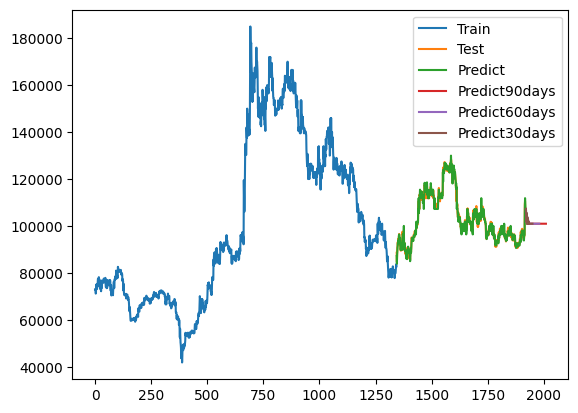

In [11]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index,y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(y_pred), step=1)
plt.plot(test_data_index_pred, y_pred)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days', 'Predict60days', 'Predict30days'])
plt.show()